In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data=pd.read_excel("3.3.3.xlsx", "Лист 1")
data["q"]=9*np.pi*0.725*1e-2*6*0.25*1e-3*abs(1/data["T1,s"]-1/data["T2,s"])*1.85*1e-5*np.sqrt(abs(2*1.85*1e-5*(data["U1,kv"]*6*0.25*1e-3/data["T2,s"]-data["U2,kv"]*6*0.25*1e-3/data["T1,s"])/(data["U1,kv"]-data["U2,kv"])**3/1e6/9.82/0.898/1e3))

In [13]:
data

,"U1,kv","U2,kv","T1,s",L1,L2,"T2,s",q
0,0.92,0.73,10.40,6,6,15.90,6.364161e-19
1,0.50,0.66,8.78,6,6,6.30,6.474542e-19
2,0.66,0.38,8.50,6,6,16.53,3.805200e-19
3,0.38,0.92,56.25,6,6,13.00,2.413530e-19
4,0.92,0.48,6.33,6,6,11.91,1.362114e-19
5,0.48,0.90,12.65,6,6,6.36,2.695820e-19
6,0.90,0.48,7.85,6,6,16.05,2.430073e-19
7,0.60,0.92,13.81,6,6,8.63,1.847281e-19
8,0.92,0.48,7.76,6,6,17.34,3.265443e-19
9,0.48,0.90,10.06,6,6,4.81,5.781158e-19


In [36]:
def group(x:int):
    x=x*1e19
    if(x<2.4):return 1
    if(x<4):return 2
    if(x<5.8):return 3
    if(x<8):return 4
data["n"]=data["q"].apply(group)
data


,"U1,kv","U2,kv","T1,s",L1,L2,"T2,s",q,n
0,0.92,0.73,10.40,6,6,15.90,6.364161e-19,4
1,0.50,0.66,8.78,6,6,6.30,6.474542e-19,4
2,0.66,0.38,8.50,6,6,16.53,3.805200e-19,2
3,0.38,0.92,56.25,6,6,13.00,2.413530e-19,2
4,0.92,0.48,6.33,6,6,11.91,1.362114e-19,1
5,0.48,0.90,12.65,6,6,6.36,2.695820e-19,2
6,0.90,0.48,7.85,6,6,16.05,2.430073e-19,2
7,0.60,0.92,13.81,6,6,8.63,1.847281e-19,1
8,0.92,0.48,7.76,6,6,17.34,3.265443e-19,2
9,0.48,0.90,10.06,6,6,4.81,5.781158e-19,3


In [44]:
for i in range(1,5):
    print([data[data["n"]==i]["q"].mean()/i,data[data["n"]==i]["q"].std()/i, i*len(data[data["n"]==i]["q"])])

[1.7902709911547393e-19, 4.026897575256326e-20, 3]
[1.474267117923549e-19, 2.3904991619005124e-20, 16]
[1.8919973720085163e-19, 4.9575828034778936e-21, 6]
[1.6048378887853263e-19, 1.9512791503982573e-21, 8]


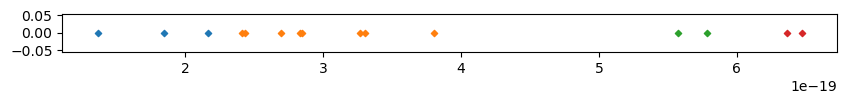

In [43]:
plt.figure(figsize=(10, 0.5))
for i in range(1,5):
    plt.scatter(data[data["n"]==i]["q"], np.zeros(len(data[data["n"]==i]["q"])), s=10, marker="D")


In [42]:
data[data["n"]==2]["q"]

2     3.805200e-19
3     2.413530e-19
5     2.695820e-19
6     2.430073e-19
8     3.265443e-19
11    2.844903e-19
12    3.299257e-19
14    2.834049e-19
Name: q, dtype: float64